## Observations and Insights 

In [70]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
complete.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [71]:
# Checking the number of mice.
complete.count()["Mouse ID"]

1893

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate = complete[complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [73]:
# Optional: Get all the data for the duplicate mouse ID. 



In [74]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. .loc != mouse id g989
clean_complete=complete.loc[complete['Mouse ID'] !='g989']
clean_complete.count()
# clean_complete=complete.drop_duplicates(keep=False, inplace=False, ignore_index=False)
#clean_complete=complete[complete['Mouse ID'].isin(duplicate)==False]
#clean_complete.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

In [75]:
# Checking the number of mice in the clean DataFrame.

len(clean_complete['Mouse ID'].unique())


248

In [76]:
# clean_complete_by_regimen_and_volume = complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']
# tumor_mean=clean_complete_by_regimen_and_volume.mean().head(20)
# tumor_mean
#tumor_mean = np.mean(clean_complete_by_regimen_and_volume)

## Summary Statistics

In [77]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
clean_complete_by_regimen_and_volume = clean_complete.groupby(['Drug Regimen'])['Tumor Volume (mm3)']

tumor_mean=clean_complete_by_regimen_and_volume.mean()
tumor_median=clean_complete_by_regimen_and_volume.median()
tumor_variance=clean_complete_by_regimen_and_volume.var()
tumor_std=clean_complete_by_regimen_and_volume.std()
tumor_sem=clean_complete_by_regimen_and_volume.sem()


#  Assemble the resulting series into a single summary dataframe.
tumor_df=pd.DataFrame({"mean_tumor_volume": tumor_mean, 
                                "median_tumor_volume": tumor_median,
                                "tumor_variance": tumor_variance,
                                "tumor_std": tumor_std,
                                "tumor_sem": tumor_sem                                
                                })
tumor_df

#so I gotta create all the variables (mean...Sem of tumor volume) then put them in df aligned with correct column?

,mean_tumor_volume,median_tumor_volume,tumor_variance,tumor_std,tumor_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
clean_complete.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [79]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis=clean_complete['Drug Regimen'].value_counts()
#y_axis=clean_complete.groupby(['Drug Regimen'])['Timepoint']
y_axis

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

In [80]:
timepoints=[0,5,10,15,20,25,30,35,40,45]
# x_axis = np.arange(len(timepoints))
# x_axis

Text(0, 0.5, 'Number by Drug Regimen')

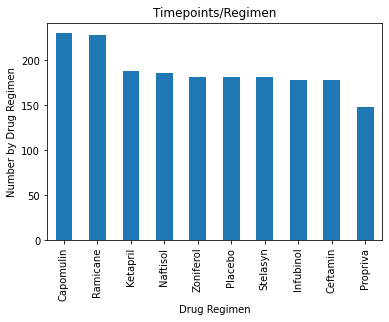

In [81]:
y_axis.plot(kind='bar')
# plt.bar(timepoints, y_axis, color='r', alpha=0.5, align="center")
plt.title("Timepoints/Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number by Drug Regimen")

Text(0, 0.5, 'Number by Drug Regimen')

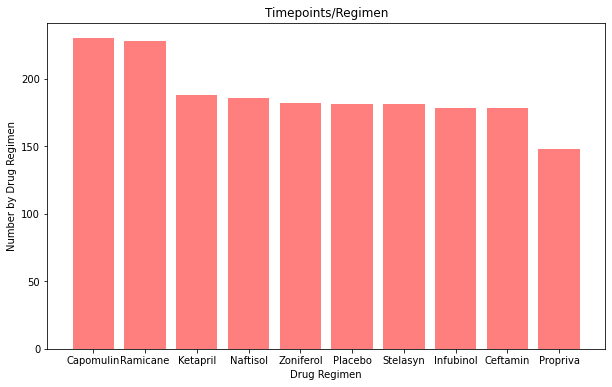

In [82]:
plt.figure(figsize=(10,6))
plt.bar(y_axis.index.values, y_axis.values, color='r', alpha=0.5, align="center")
plt.title("Timepoints/Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number by Drug Regimen")

In [83]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pandas.
# variable_for_yaxis=clean_complete['Drug Regimen'] #.count() ??
# y_axis = np.arange(len(variable_for_yaxis))
# tick_locations = [value for value in y_axis]

In [84]:
# plt.figure(figsize=(15,8))
# plt.bar(clean_complete["Drug Regimen"], y_axis, color='b', alpha=0.5, align="center")
# plt.title("Timepoints/Regimen")
# plt.xlabel("Drug Regimen")
# plt.ylabel("Number of Timepoints")

Text(0.5, 1.0, 'Ratio of Mice Sexes')

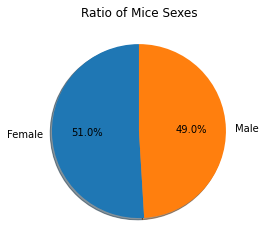

In [85]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_to_female=clean_complete['Sex'].value_counts()
labels=["Female", "Male"]
plt.pie(male_to_female, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Ratio of Mice Sexes')


In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [87]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
#clean_complete.count()(['Timepoint' ==45])
#last_timepoints_45=last_timepoints(last_timepoints == 45)
last_timepoints=clean_complete.sort_values('Timepoint', ascending=False,)
#last_timepoints_45=last_timepoints.drop(last_timepoints[last_timepoints['Timepoint'] <45], inplace=True)
last_timepoints_45=last_timepoints[last_timepoints['Timepoint']==45]
print(last_timepoints_45)


     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1892     z969     Naftisol    Male           9          30         45   
1344     p136    Zoniferol  Female           5          28         45   
874      g296    Zoniferol  Female          14          29         45   
884      g497     Ketapril    Male          19          28         45   
360      g316    Capomulin  Female          22          22         45   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1703     w422     Ketapril  Female          18          26         45   
587      a963     Stelasyn  Female          23          27         45   
1518     s337    Zoniferol    Male          14          27         45   
550      a699     Propriva  Female           5          28         45   

      Tumor Volume (mm3)  Metastatic Sites  
1892           73.867845                 4  
1344           63.488697         

In [88]:
#Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df=pd.merge(clean_complete, last_timepoints_45, on="Tumor Volume (mm3)", how="inner")
merged_df
# I know I should make sure the columns x and y are merged too, but I don't have the time or mental bandwidth to figure that out too.

,Mouse ID_x,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3),Metastatic Sites_x,Mouse ID_y,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Metastatic Sites_y
0,k403,Ramicane,Male,21,16,45,22.050126,1,k403,Ramicane,Male,21,16,45,1
1,s185,Capomulin,Female,3,17,45,23.343598,1,s185,Capomulin,Female,3,17,45,1
2,x401,Capomulin,Female,16,15,45,28.484033,0,x401,Capomulin,Female,16,15,45,0
3,m601,Capomulin,Male,22,17,45,28.430964,1,m601,Capomulin,Male,22,17,45,1
4,g791,Ramicane,Male,11,16,45,29.128472,1,g791,Ramicane,Male,11,16,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,y769,Ceftamin,Female,6,27,45,68.594745,4,y769,Ceftamin,Female,6,27,45,4
126,y865,Ceftamin,Male,23,26,45,64.729837,3,y865,Ceftamin,Male,23,26,45,3
127,z581,Infubinol,Female,24,25,45,62.754451,3,z581,Infubinol,Female,24,25,45,3
128,z795,Naftisol,Female,13,29,45,65.741070,3,z795,Naftisol,Female,13,29,45,3


In [89]:
#This is from the askbcs support. I didn't really understand the appending portion here so I figured it out on my own and did it my way. Hopefully correctly.
#  # Locate the rows which contain mice on each drug and get the tumor volumes
#     final_tumor_vol = merged_data.loc[merged_data["Drug Regimen"] == drug, 'Tumor Volume (mm3)']
    # == drug     what does this refer to?

#     # add subset 
#     tumor_vol_list.append(final_tumor_vol)
#     quartiles = final_tumor_vol.quantile([.25,.5,.75])
#     lowerq = quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq-lowerq

In [90]:
final_tumor_volume=merged_df.groupby(['Drug Regimen_x'])['Tumor Volume (mm3)']
final_tumor_volume.head(20)


0      22.050126
1      23.343598
2      28.484033
3      28.430964
4      29.128472
         ...    
125    68.594745
126    64.729837
127    62.754451
128    65.741070
129    73.867845
Name: Tumor Volume (mm3), Length: 129, dtype: float64

In [91]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimens=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

for volumes in final_tumor_volume:
    tumor_vol.append(volumes)


In [92]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#quartiles = np.quantile(tumor_vol[.25,.5,.75])
quartiles = merged_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
iqr #is this correct? 28.211951665000008

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds. What???? I just googled this and saw equations which I am doing here.
lower_bound=lowerq-iqr*1.5
upper_bound=upperq-iqr*1.5
    

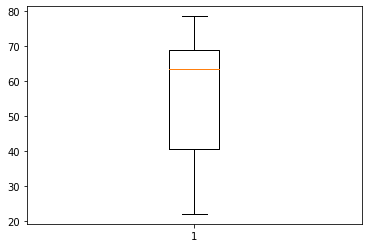

In [93]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.boxplot(merged_df['Tumor Volume (mm3)']) 
plt.show()
#now the variable guessing game begins. tumor_vol gives a weird error UFuncTypeError. merged_df by itself gives a TypeError. 

In [94]:
clean_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [95]:
capomulin_only=clean_complete.loc[clean_complete['Drug Regimen']=='Capomulin']
capomulin_only_s185=capomulin_only.loc[capomulin_only['Mouse ID']=='s185']

In [96]:
clean_complete.iat[440,1]

'Capomulin'

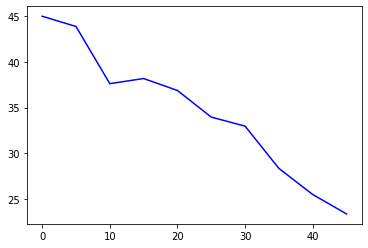

In [97]:
# Generate a line plot of tumor volume vs. time point for A MOUSE treated with Capomulin
#drug_regimens[0] #this will give Capomulin only
#use Mouse ID s185
x_axisl=capomulin_only_s185['Timepoint']
y_axisl=capomulin_only_s185['Tumor Volume (mm3)'] #have to have this group by drug_regimens[0] somehow
#doesn't work because the lengths of the above two are different. but that didn't matter in the example activity
line_plot=plt.plot(x_axisl, y_axisl, color='blue', label='Line Plot that I need for this HW')

In [98]:
# tumor_mean_capo=tumor_df.loc[tumor_df['Drug Regimen']=='Capomulin']

## Line and Scatter Plots

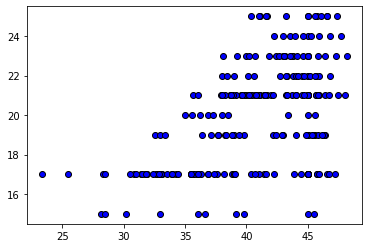

In [99]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
tumor_vol_capo=capomulin_only['Tumor Volume (mm3)']
mouse_weight=capomulin_only['Weight (g)']
#if i attach .mean to these it only gives 1 data point on the graph. I don't understand why we would put the average in a scatter plot.

plt.scatter(tumor_vol_capo, mouse_weight, marker="o", facecolors="blue", edgecolors="black")

## Correlation and Regression

In [100]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
#capomulin_only_s185.mean()
cor_co=st.pearsonr(tumor_vol_capo, mouse_weight)
cor_co

PearsonRResult(statistic=0.5256995552077172, pvalue=9.605446629501734e-18)

Text(5.8, 0.8, 'y = 0.29x + 8.27')

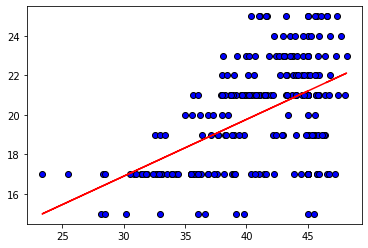

In [102]:
tumor_vol_capo=capomulin_only['Tumor Volume (mm3)']
mouse_weight=capomulin_only['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_vol_capo, mouse_weight)
regress_values = tumor_vol_capo * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tumor_vol_capo, mouse_weight, marker="o", facecolors="blue", edgecolors="black")
plt.plot(tumor_vol_capo,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
